# **Equilibrium condition for a gas-phase chemical reaction**

Throughout the discussion, we assume a gas-phase chemical reaction where gases are ideal.

Let us take an irreversible chemical reaction in a single-phase system:

\begin{equation}
0→\sum_i\nu_i\mathrm{A}_i
\end{equation}

with $\nu_i$ being stochiometric coefficients and $A_i$ chemical species. At constant $p$ and $T$ , the infinitesimal variation of the Gibbs energy $G$ is given by:

\begin{equation}
    dG=\sum_i \mu_idn_i \tag{1}
\end{equation}

where $\mu_i=\bar G_i=\left(\partial G/\partial n_i \right)_{T,p,n_{j\neq i}}$ is the partial molar Gibbs energy of $i$, _aka_, the chemical potential of $i$.
When the chemical reaction reaches equilibrium, $dG=0$, and the following condition is therefore fulfilled:

\begin{equation}
    \sum_i \mu_idn_i=0  \tag{2}
\end{equation}

The number of moles of each species at any point along the process, $n_i$, can be expressed in the following way:

\begin{equation}
    n_i=n_i(0)+\nu_i\xi \tag{3}
\end{equation}

with $n_i(0)$ referring to the number of moles of $i$ of the initial mixture, and $\xi$ being usually known as the extent of reaction. This quantity has units of moles, and it can be positive or negative depending on how the reaction proceeds from the initial mixture. Therefore eq (2) can be expressed as:

\begin{equation}
    d\xi\sum_i \nu_i\mu_i=0  \tag{4}
\end{equation}

which leads to the condition for equilibrium in a chemical reaction:
\begin{equation}
    \left(\frac{\partial G}{\partial \xi}\right)_{T,p}=\sum_i \nu_i\mu_i=0  \tag{5}
\end{equation}

Note that, when the chemical reaction is carried out in a constant-volume vessel, the state function that should be minimized is the Helmholtz energy $A$. Interestingly, the variation of $A$ at constant $T$ and $V$ leads to:
\begin{equation}
    dA=\sum_i \mu_idn_i \tag{6}
\end{equation}
whose minimization results in an equation similar to eq (5): $\left(\frac{\partial A}{\partial \xi}\right)_{T,V}=\sum_i \nu_i\mu_i=0$. Consequently, the condition for equilibrium in a chemical reaction is given by $\sum_i \nu_i\mu_i=0$, independently on how the gas-phase chemical reaction was carried out (at constant $T$ and $p$, or at constant $T$ and $V$).

The chemical potential of an ideal gas in a mixture can be expressed as:
\begin{equation}
    \mu_i =\mu_i^0+RT\ln(p_i/p^0)  \tag{7}
\end{equation}
with $\mu_i^0$ being the chemical potential of gas $i$ for a pressure of $p^0=1$ bar, and $p_i$ the partial pressure of the gas. Therefore, the equilibrium condition of eq (5) can be expressed as:
\begin{equation}
    \sum_i \nu_i\mu_i=\sum_i\nu_i\mu_i^0+RT\sum_i\nu_i\ln(p_{i,eq}/p^0)=0  \tag{8}
\end{equation}
which can be expressed as:
\begin{equation}
    \Delta G^0=-RT\ln\left(\prod_i(p_{i,eq}/p^0)^{\nu_i}\right)  \tag{9}
\end{equation}
where $\Delta G^0$ is the standard Gibbs energy or reaction, and the product of eq (9) is the so-called standard pressure equilibrium constant $K_p^0$, which leads to the well known equation:
\begin{equation}
    \Delta G^0=-RT\ln K_p^0  \tag{10}
\end{equation}


## **The case of a chemical reaction conducted at constant $p$ and $T$**
Using Dalton's law, $p_i=px_i$, the chemical potential obtained in eq (7) can be expressed as:
\begin{equation}
    \mu_i =\mu_i^0+RT\ln(p/p^0)+RT\ln x_i=\mu_i^*+RT\ln x_i  \tag{11}
\end{equation}
where $\mu_i^*$ is the chemical potential of pure $i$ and is a constant for a chemical transformation at constant $T$ and $p$, while $x_i$ depends on $\xi$ in the following way [see eq (3)]:
\begin{equation}
    x_i =\frac{n_i(0)+\nu_i\xi}{n(0)+\Delta\nu\xi} \tag{12}
\end{equation}
with $n(0)$ being the initial number of moles, and $\Delta\nu=\sum_i\nu_i$. From eq (3) and the gas law, it follows that, in a constant $T$ and $p$ chemical reaction, the volume of the reaction vessel has to change in the same proportion as the number of moles.   
The variation of the Gibbs energy with $\xi$ can be easily obtained from eqs (3) and (11):
\begin{equation}
    G =\sum_in_i\mu_i=\sum_in_i(0)\mu_i^*+\xi\sum_i\nu_i\mu_i^*+RT\sum_in_i\ln x_i \tag{13}
\end{equation}
which can be expressed in the following way:
\begin{equation}
    G =G^*(0)+\xi\Delta G^*+\Delta _{\mathrm{mix}} G(\xi) \tag{14}
\end{equation}
with $G^*(0)$ being the Gibbs energy of the pure gases (_i.e._, before mixing) present at the beginning of the chemical reaction. $\Delta G^*$ is the change in $G$ of the separated pure reactants, into the separated pure products, both at $p$ and $T$. This quantity is just the standard Gibbs energy of reaction $\Delta G^0$ when $p=1$ bar. The last term represents the drop in the Gibbs energy when the gases mix up, and it shows a complicated dependence with the extent of reaction:
\begin{equation}
    \Delta _{\mathrm{mix}} G(\xi)=RT\sum_i(n_i(0)+\nu_i\xi)\ln \frac{n_i(0)+\nu_i\xi}{n(0)+\Delta\nu\xi} \tag{15}
\end{equation}
Minimization of eq (13) leads to:
\begin{equation}
    \left(\frac{\partial G}{\partial \xi}\right)_{T,p}=\sum_i\nu_i\mu_i^*+RT\sum_i\left(\frac{dn_i}{d\xi}\ln x_i+n\frac{dx_i}{d\xi}\right) \\  
    =\sum_i\nu_i\mu_i^0+RT\sum_i\ln(p/p^0)^{\nu_i}+RT\sum_i\ln x_i^{\nu_i}+nRT\sum_i\frac{dx_i}{d\xi} \\
    =\Delta G^0+RT\sum_i\ln(p_i/p^0)^{\nu_i}+nRT\frac{d}{d\xi}\sum_ix_i \\
    =\Delta G^0+RT\sum_i\ln(p_i/p^0)^{\nu_i} \tag{16}
\end{equation}
At equilibrium:
\begin{equation}
    \left(\frac{\partial G}{\partial \xi}\right)_{T,p}=\Delta G^0+RT\sum_i\ln(p_{i,eq}/p^0)^{\nu_i}=0 \\
    \Delta G^0=-RT\ln K_p^0\tag{17}
\end{equation}
which is the same result as that obtained above.


## **The case of a chemical reaction conducted at constant $V$ and $T$**

For a chemical reaction conducted at constant $p$ and $T$, the state function that needs to be minimized in the Helmholtz energy $A$. This magnitude can be expressed as::
\begin{equation}
    A =\sum_in_i\bar A_i \tag{18}
\end{equation}

where $\bar A_i=\left(\partial A/\partial n_i \right)_{T,p,n_{j\neq i}}$ is the partial molar Helmholtz energy of ideal gas $i$. This quantity can be easily related to the chemical potential by noting that:

\begin{equation}
    A=G-pV \\
    A=G-nRT  \tag{19}
\end{equation}

Using eq(14) for $G$, the Helmholtz energy can be expressed as:

\begin{equation}
    A   =\sum_in_i(0)\mu_i^*+\xi\sum_i\nu_i\mu_i^*-nRT+\Delta _{\mathrm{mix}} G(\xi) \tag{20}
\end{equation}

Since $\mu_i^*$ depends on $p$, for a constant $V$ process, this term is no longer constant. Therefore, the first three terms of eq(20) depend on $\xi$.    
Minimization of eq (20) leads to:

\begin{equation}
    \left(\frac{\partial A}{\partial \xi}\right)_{T,V}=n(0)\frac{\Delta \nu RT}{n} + \sum_i\nu_i\mu_i^* + \xi \Delta \nu \frac{\Delta \nu RT}{n}-\Delta \nu RT+ RT\sum_i\left(\frac{dn_i}{d\xi}\ln x_i+n\frac{dx_i}{d\xi}\right) \\
    = \sum_i\nu_i\mu_i^* + \frac{\Delta \nu RT}{n} \left(n(0)+\xi \Delta \nu -n\right)+ RT\sum_i\left(\frac{dn_i}{d\xi}\ln x_i+n\frac{dx_i}{d\xi}\right)  \\
    =\sum_i\nu_i\mu_i^* +RT\sum_i\left(\frac{dn_i}{d\xi}\ln x_i+n\frac{dx_i}{d\xi}\right)\tag{21}
\end{equation}

We have used in the above equation, the following derivatives:

\begin{equation}
    \left(\frac{\partial p}{\partial \xi}\right)_{T,V}=\frac{\Delta \nu RT}{V} \\
    \left(\frac{\partial \mu_i^*}{\partial \xi}\right)_{T,V}=\frac{\Delta \nu RT}{n} \tag{22}
\end{equation}



The result of eq(21) is the same as eq(16), and therefore, it leads to the same final result (eqs 10 and 17).




### **Determination of $\mu^0$ of a substance**
The calculation of $G$ involves the determination of $\mu^0$. Below, you will see how statistical mechanics provides a convenient way to calculate this value. In this section, we are going to see how to obtain a more approximate value. The chemical potential for a pure substance is just the molar Gibbs energy:
\begin{equation}
    \mu^0=G_m^0=H_m^0-TS_m^0 \tag{23}
\end{equation}
For an ideal gas, which is our working substance throught this Notebook, the standard enthalpy is given by:
\begin{equation}
    H_m^0=H_m^0(T_{ref})+C_{p,m}^0(T-T_{ref}) \tag{24}
\end{equation}
where $H_m^0(T_{ref})$ is the standard enthalpy at a reference temperature $T_{ref}$. Besides, the standard molar entropy is:
\begin{equation}
    S_m^0=S_m^0(T_{ref})+C_{p,m}^0\ln\frac{T}{T_{ref}} \tag{25}
\end{equation}
Assuming no vibrational contribution to $C_{p,m}^0$, this value can be obtained from:
\begin{equation}
    C_{p,m}^0=\frac{5+rot_\mathrm{DOF}}{2}R=\mathrm{DOF}^{\dagger} R \tag{26}
\end{equation}
where $rot_\mathrm{DOF}$ refers to the number of rotational degrees of freedom of the molecule: 2 for a linear molecule, and 3 for a non-linear one. On the other hand, $\mathrm{DOF}_i^{\dagger}$ is the total number of accesible degrees of freedom at temperature $T$.
Combining the above equations, we get to the following approximate result for $G_{m,i}^0$ of a gas $i$:
\begin{equation}
 G_{m,i}^0(T)= H_{m,i}^0(T_{ref})+\mathrm{DOF}_i^{\dagger}RT\left(1-\ln \frac{T}{T_{ref}}\right)-TS_m^0(T_{ref})-\mathrm{DOF}_i^{\dagger}RT_{ref}  \tag{27}
\end{equation}
In this part of the Notebook, we will use a value for $T_{ref}=298.15$ $\mathrm{K}$.
With these assumptions, an approximate formula for the standard Gibbs energy of reaction can be obtained:
\begin{equation}
 \Delta G^0(T)= \Delta H^0(T_{ref})-T\Delta S^0(T_{ref})+\sum_i \nu_i\left[\mathrm{DOF}_i^{\dagger}RT\left(1-\ln \frac{T}{T_{ref}}\right)+\mathrm{DOF}_i^{\dagger}RT_{ref}\right] \\
 = \Delta H^0(298.15)-T\Delta S^0(298.15)+4\Delta \nu RT \left(1-\Theta+\ln \Theta\right) \tag{28}
\end{equation}
with $\Theta=298.15/T$ and assuming all molecules are non-linear and only translational and rotational degrees of freeedom are accesible at a given temperature, _i.e._, $\mathrm{DOF}_i^{\dagger}=4$ . For temperatures not very very far from $298.15$ $\mathrm{K}$, a second order Taylor polynomial for $\ln \Theta$ provides the following result for the standard Gibbs energy of reaction:
\begin{equation}
 \Delta G^0(T) = \Delta H^0(298.15)-T\Delta S^0(298.15)-2\Delta \nu RT (\Theta-1)^2 \tag{29}
\end{equation}


In [1]:
#@title _This cell installs several packages needed in the Notebook. It takes $\approx$ 2 min_
%%capture
! sudo apt update
! sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended
%pip install --prefer-binary pyscf
%pip install pyscf[geomopt]
%pip install dftd3 dftd4
%pip install pubchempy chempy
%pip install --upgrade x3dase
%pip install -q ipywidgets

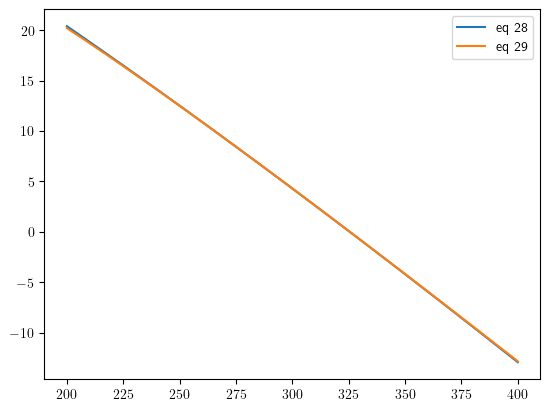

In [69]:
#@title Test of $\Delta G^0(T)$ (eqs 23 and 24). The user must provide $\Delta G^0(298.15)$ in KJ/mol and $\Delta \nu$. This function can be used in the next cell
# Defining some constants
m_u    = 1.66053886e-27      # atomic mass constant in kg
h      = 6.6260693e-34       # Planck's constant in J*s
k_B    = 1.3806505e-23       # Boltzmann's constant in J/K
c      = 2.99792558e8        # Speed of light in m/s
bar2Pa = 1e5                 # 1 bar to N/m**2
Pa2bar = 1e-5                # 1 Pa=N/m**2 to bar
p0     = 1                   # standard pressure in bar
R      = 8.31447e-3          # Gas constant in kJ/(K mol)
H2kcal = 627.509             # Hartree to kcal/mol
H2kJ   = 2625.5              # Hartree to kJ/mol
Rbar   = 0.0831447           # R in bar L / (mol K)

import numpy as np
import matplotlib.pyplot as plt

def deltaG_T(DH0,DS0,delta_nu,T):
  theta = 298.15 / T
  return DH0 - T * DS0 +  4 * delta_nu * R * T * ( 1 - theta + np.log(theta))

def deltaG2_T(DH0,DS0,delta_nu,T):
  theta = 298.15 / T
  return DH0 - T * DS0 - 2 * delta_nu * R * T * (theta - 1) ** 2

DH0 = 54.407
DS0 = 0.167

T = np.linspace(200,400,1000)
plt.plot(T,deltaG_T(DH0,DS0,1,T),label='eq 28')
plt.plot(T,deltaG2_T(DH0,DS0,1,T),label='eq 29')
plt.legend()

plt.show()

**Comment**

Below, eqs 23 and 24 should be compared with the formula from statistical mechanics

### **Working with an example reaction $0→\nu_iA_i$**


In [67]:
#@title To input your chemical rxn, use blank spaces to separate stochiometric coeffs, species and arrow, like in this example: A + B -> 2 C + 3 D
%matplotlib inline

from ipywidgets import interactive, FloatSlider, IntSlider
from chempy.chemistry import Species, Equilibrium, Reaction
from chempy import Substance
import numpy as np
import matplotlib.pyplot as plt


r = Reaction.from_string(input("Input your chemical reaction here:  "))
eq = Equilibrium(r.reac, r.prod)

#Obtain the stoichiometric coefficients and the species from the rxn
nui_from_r = []; species = []; ni0_from_r = []
for s in r.reac:
  species.append(s)
  nui_from_r.append(-r.reac[s])
  ni0_from_r.append(r.reac[s])
for s in r.prod:
  species.append(s)
  nui_from_r.append(r.prod[s])
  ni0_from_r.append(0)

fake_keys = ['H2O','H2']
subst = {k: Substance.from_formula(k) for k in fake_keys}
eq_unicode=eq.unicode(subst)
eq_latex='$'+eq.latex(subst)+'$'

# T = 298.15 K (can be changed with the slider). DH0 and DS0 should be input
T = 298.15
# These values are taken from the N2O4 decomposition example below
DH0 = 54.407
DS0 = 0.167
#DG0 = deltaG_T(DH0,DS0,sum(nui_from_r),T)
#n_species taken from the length of the nui_from_r
n_species = len(nui_from_r)
#nui is an array with the stochiometric coeffs
nui = np.array(nui_from_r)
#ni0 is an array with the initial number of moles. For nice-looking graphs, we make the number of moles equal to the corresponding stochiometric coeffs for reactatns: n_i = nui_i
ni0 = np.array(ni0_from_r)

#max(ni0) has to be changed if a limiting reactant exists
x = np.linspace(1e-10,max(ni0)-1e-10,num=10000)
#n is the total number of moles and xi is the molar fraction
n = sum(ni0) + sum(nui) * x
xi = []
for k,ele in enumerate(ni0):
  xi.append((ni0[k] + x * nui[k]) / n)
xia = np.array(xi)
print('\n',eq_unicode,'EQUILIBRIUM PROPERTIES')

plt.rcParams['text.usetex'] = True

def f(p,T):
    deltaG0 = deltaG_T(DH0,DS0,sum(nui),T)
    #mui0 are the standard chemical potentials of the species (kJ/mol)
    mui0_from_r = []
    #G of the reacts is 0 and for the products is shared equally
    G_per_prod = deltaG0 / len(r.prod)
    for i in range(len(r.reac)):
      mui0_from_r.append(0)
    for s in r.prod:
      mui0_from_r.append(G_per_prod/r.prod[s])

    mui0 = np.array(mui0_from_r)
    #muistar is the chemical potential for the pure species = mui0+RTln(p/p0)
    k_p = np.exp(-deltaG0/R/T)
    print('Kp from stantard Gibbs energy of rxn = %5.3f' % k_p)
    plt.figure(2)
    muistar = mui0 + R * T * np.log(p/p0)
    G_star = 1 / R / T * ( sum(ni0 * muistar) + x * sum(nui * muistar) )
    G_mix  = n * sum(xia * np.log(xia))
    G = G_star + G_mix
    y = np.zeros(x.size)
    x_eq = x[np.argmin(G)]
    n_eq = sum(ni0) + sum(nui) * x_eq
    p_eq = []
    print('Extent of rxn = %5.3f mol' % x_eq )
    print('Total number of moles = %5.3f mol' % (n_eq))
    for k,ele in enumerate(ni0): print('Moles of %a = %5.3f mol' % (species[k],ele+x_eq * nui[k]))
    k_from_peq = 1
    for k,ele in enumerate(ni0):
      p_eq.append((ele+x_eq * nui[k])/n_eq * p )
      print('Partial pressure of %a = %5.3f bar' % (species[k],p_eq[k]))
      k_from_peq *= p_eq[k] ** nui[k]
    print('kp from the partial pressures %5.3f' % k_from_peq)
    plt.title(eq_latex,fontsize=20)
    plt.plot(x,G_star,'--',color='blue',label=r'$(G^*(0)+\xi\Delta G^*)/RT$')
    plt.plot(x,G_mix,'--',color='red',label=r'$\Delta _{mix}G/RT$')
    plt.plot(x,G,'-',color='black',label=r'$G/RT$')
    plt.plot(x,y,':',color='black')
    plt.legend()
    plt.xlim(0,max(x))
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.ylabel(r'$G/RT (\mathrm{mol})$',fontsize=20)
    plt.xlabel(r'$\xi (\mathrm{mol})$',fontsize=20)
    plt.show()

interactive_plot = interactive(f, p=FloatSlider(value=1, min=0.1, max=10.0, step=0.1, description='p(bar):'), T=FloatSlider(value=298.15, min=200.15, max=400.15, step=1.00, description='T(K):'))
output = interactive_plot.children[-1]
output.layout.height = '800px'
interactive_plot

Input your chemical reaction here:  A->2B

 A ⇌ 2B EQUILIBRIUM PROPERTIES


interactive(children=(FloatSlider(value=1.0, description='p(bar):', max=10.0, min=0.1), FloatSlider(value=298.…

**Comments:**

In the above figure, the slope of the blue line is $=-\ln K_x$

Van't Hoff equation (that assumes a temperature-independent $\Delta H^0$) could be compared with our results in a separate figure

# **Calculation of $K_p$ using thermochemistry and simulations: the $\mathrm{N}_{2}\mathrm{O}_{4} \rightleftharpoons 2 \mathrm{NO}_{2}$ reaction**

In [65]:
#@title Function to determine $\mu^0$ based on a Python script from [AutoMeKin](https://github.com/emartineznunez/AutoMeKin)

import numpy as np

def G_m_0(temp,m,A,B,C,lin_A,nat_A,sigma,spin,*freq):
  import math
  q_t = (2*math.pi*m*m_u*k_B*temp/h/h)**1.5*k_B*temp/bar2Pa
  q_r = 1 ; q_v = 1 ; Sr = 0 ; Sv = 0 ; Ur = 0 ; Uv = 0
  if nat_A > 1:
    rA  = h * c * 100 * A / k_B
    rB  = h * c * 100 * B / k_B
    rC  = h * c * 100 * C / k_B
    if lin_A == 0:
      q_r = 1 / sigma * math.sqrt(math.pi)*(temp**1.5/math.sqrt(rA*rB*rC))
    else:
      if rA == 0:
        rl = math.sqrt(rB*rC)
      elif rB == 0:
        rl = math.sqrt(rA*rC)
      else:
        rl = math.sqrt(rA*rB)
      q_r = 1 / sigma * temp / rl
    for ele in freq:
      rv   = h * c * 100 * float(ele) / k_B
      q_v *= 1 / (1 - np.exp(-rv/temp))
  q_e = spin + 1
  q = q_t * q_r * q_v * q_e
  return - R * temp * np.log(q)

def S_m_0(temp,m,A,B,C,lin_A,nat_A,sigma,spin,*freq):
  import math
  q_t = (2*math.pi*m*m_u*k_B*temp/h/h)**1.5*k_B*temp/bar2Pa
  St = R * (np.log(q_t) + 2.5)
  q_r = 1 ; q_v = 1 ; Sr = 0 ; Sv = 0
  if nat_A > 1:
    rA  = h * c * 100 * A / k_B
    rB  = h * c * 100 * B / k_B
    rC  = h * c * 100 * C / k_B
    if lin_A == 0:
      q_r = 1 / sigma * math.sqrt(math.pi)*(temp**1.5/math.sqrt(rA*rB*rC))
      Sr = R * (1.5 + np.log(q_r))
    else:
      if rA == 0:
        rl = math.sqrt(rB*rC)
      elif rB == 0:
        rl = math.sqrt(rA*rC)
      else:
        rl = math.sqrt(rA*rB)
      q_r = 1 / sigma * temp / rl
      Sr = R * (1 + np.log(q_r))
    for ele in freq:
      rv   = h * c * 100 * float(ele) / k_B
      q_v *= 1 / (1 - np.exp(-rv/temp))
      Sv  += R * (rv / temp / (np.exp(rv/temp) - 1) - np.log(1 - np.exp(-rv/temp)) )
  q_e = spin + 1
  S_e = R * np.log(q_e)
  S = St + Sr + Sv + S_e
  return S

## **We now focus on the $\mathrm{N}_{2}\mathrm{O}_{4} \rightleftharpoons 2 \mathrm{NO}_{2}$ reaction**

In [11]:
#@title Using [Chempy](https://pypi.org/project/chempy/) to handle the $\mathrm{N}_{2}\mathrm{O}_{4} \rightleftharpoons 2 \mathrm{NO}_{2}$ reaction
from operator import mul
from functools import reduce
from itertools import product
import chempy
from chempy import Substance
from chempy.chemistry import Species, Equilibrium, Reaction
from chempy.equilibria import EqSystem, NumSysLog, NumSysLin
from chempy import balance_stoichiometry
import numpy as np
import sympy as sp
sp.init_printing()
import matplotlib.pyplot as plt

temp = 298.15
reactf='N2O4'
prodf='NO2'
spin=[]
react = Substance.from_formula(reactf)
prod  = Substance.from_formula(prodf)
#print("Reactant:",react.unicode_name)
#print("Product :",prod.unicode_name)
spin_react=spin_prod=0
for ele in react.composition.keys(): spin_react += ele * react.composition[ele]
spin.append(spin_react % 2)
for ele in prod.composition.keys(): spin_prod += ele * prod.composition[ele]
spin.append(spin_prod % 2)
print("Spin list:",spin)

reac, pr = balance_stoichiometry({reactf},{prodf})

equilibrium = Equilibrium(reac, pr)

keys = [reactf,prodf]

subst = {k: Substance.from_formula(k) for k in keys}

r_latex=equilibrium.latex(subst)
r_unicode=equilibrium.unicode(subst)
print(r_unicode)


Spin list: [0, 1]
N₂O₄ ⇌ 2 NO₂


In [12]:
#@title Retrieving structures of reactant and product from [PubChem](https://pubchem.ncbi.nlm.nih.gov/)
import pubchempy as pcp

keys1=['N2O4', 'nitrogen dioxide']
#print(keys)
#print(keys1)
natom = []
for k,ele in enumerate(keys1):
  molA = ele
  #molA = input('Name of your substance: ')
  queryA0 = pcp.get_compounds(molA,'name')
  queryA = pcp.get_compounds(molA,'name',record_type='3d')
  if(len(queryA)==0): queryA = queryA0
  cid_A = pcp.get_cids(molA)
  if len(cid_A) == 0: print('Molecule not found')
  else: print('CID of',Substance.from_formula(keys[k]).unicode_name,': ',cid_A)

  m = queryA[0]
  natom.append(len(m.atoms))
  f = open(keys[k]+'.xyz','w')
  if natom[k] > 1:
    f.write(str(natom[k])+'\n\n')
    for i,a in enumerate(m.atoms):
      if a.z is None: a.z = 0.0
      f.write(m.elements[i]+' '+str(a.x)+' '+str(a.y)+' '+str(a.z)+'\n')
  else:                            f.write(m.elements[0]+' 0. 0. 0.\n')
  f.close()

CID of N₂O₄ :  [25352]
CID of NO₂ :  [3032552]


In [60]:
#@title ### Using [pyscf](https://pyscf.org) to optimize the structures at the PBE0-D4/6-31G level of theory. This takes a few minutes...
%%capture
from pyscf import gto, scf
from pyscf.hessian import thermo
from pyscf.geomopt.geometric_solver import optimize
import dftd4.pyscf as disp4
import os

#os.environ['OMP_NUM_THREADS'] = "8"

e0 = []
e0nd = []
zpe = []
lin = []
A = []
B = []
C = []
freq_info = []
mass = []
sigma = []
mol_eq = []
thermos = []

functional ='pbe0'
for k,ele in enumerate(keys):
  mol = gto.M(atom = ele+".xyz",spin=spin[k],basis='6-31g')
  if spin[k] == 0: mf = mol.RKS(xc=functional)
  else: mf = mol.UKS(xc=functional)
# optimization
  mol_eq.append(optimize(mf, maxsteps=100))

  if spin[k] == 0: mf = mol_eq[k].RKS(xc=functional).run()
  else: mf = mol_eq[k].UKS(xc=functional).run()

  hessian = mf.Hessian().kernel()

  freq_info.append(thermo.harmonic_analysis(mf.mol, hessian))
  thermo_info = thermo.thermo(mf, freq_info[k]['freq_au'], temp, 101325)
  mass.append(mol.atom_mass_list(isotope_avg=True))
  rot_info = thermo.rotation_const(mass[k],mol_eq[k].atom_coords())
  sigma.append(thermo.rotational_symmetry_number(mol_eq[k]))

  A.append(rot_info[0] * 0.033357)
  B.append(rot_info[1] * 0.033357)
  C.append(rot_info[2] * 0.033357)
  if A[k] == B[k] and C[k] <= 0.001: lin.append(1)
  else: lin.append(0)

  d4 = disp4.DFTD4Dispersion(mol_eq[k],xc=functional)
  e0.append(thermo_info['E0'][0] + d4.kernel()[0])
  e0nd.append(thermo_info['E0'][0])
  zpe.append(thermo_info['ZPE'][0])
  thermos.append(thermo_info)

In [61]:
#@title ###Thermo results from PySCF

g0 = thermos[0]['G_tot'][0]
g1 = thermos[1]['G_tot'][0]
h0 = thermos[0]['H_tot'][0]
h1 = thermos[1]['H_tot'][0]
s0 = thermos[0]['S_tot'][0]
s1 = thermos[1]['S_tot'][0]
print('DG=',(2 * g1 - g0) * H2kJ)
print('DH=',(2 * h1 - h0) * H2kJ)
print('DS=',(2 * s1 - s0) * H2kJ)

DG= -0.09128892516238807
DH= 49.720153350084445
DS= 0.16706839602600146


Frequencies of N₂O₄ (cm^-1)
        88
       229
       316
       433
       484
       653
       749
       807
      1269
      1373
      1729
      1761

Frequencies of NO₂ (cm^-1)
       727
      1319
      1615

deltaG: 4.563 kJ/mol
deltaH: 54.407 kJ/mol
deltaS: 0.167 kJ/mol


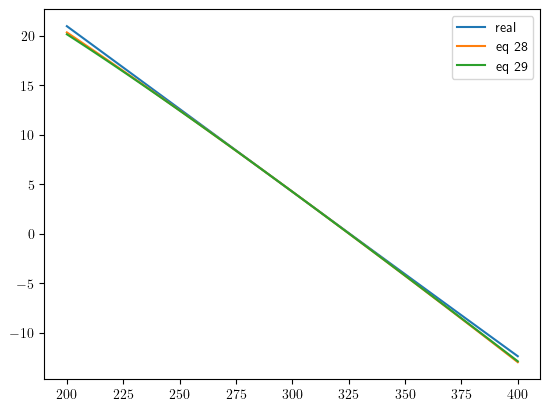

In [66]:
#@title Computing $G_m^0$, _aka_ the standard chemical potential $\mu^0$
from x3dase.visualize import view_x3d_n
from ase.io import read
import IPython

gcorr = []
g = []
enthal = []
s = []

temp = 298.15
for k,ele in enumerate(keys):
  gcorr.append(G_m_0(temp,sum(mass[k]),A[k],B[k],C[k],lin[k],natom[k],sigma[k],spin[k],*freq_info[k]['freq_wavenumber']))
  g.append( (e0[k] + zpe[k]) * H2kJ + gcorr[k] )
  s.append(S_m_0(temp,sum(mass[k]),A[k],B[k],C[k],lin[k],natom[k],sigma[k],spin[k],*freq_info[k]['freq_wavenumber']))
  print('Frequencies of',Substance.from_formula(ele).unicode_name,'(cm^-1)')
  for ifreq in freq_info[k]['freq_wavenumber']:
    print('%10.0f' % ifreq)
  gto.tofile(mol_eq[k],str(keys[k])+'_opt.xyz')
  print("")


deltaG = (2 * g[1] - g[0])
deltaS = (2 * s[1] - s[0])
deltaH = deltaG  + temp * deltaS

print('deltaG: %5.3f kJ/mol' % deltaG)
print('deltaH: %5.3f kJ/mol' % deltaH)
print('deltaS: %5.3f kJ/mol' % deltaS)



def deltaG_comput_t(temp):
  gcorr = []
  g = []
  for k,ele in enumerate(keys):
    gcorr.append(G_m_0(temp,sum(mass[k]),A[k],B[k],C[k],lin[k],natom[k],sigma[k],spin[k],*freq_info[k]['freq_wavenumber']))
    g.append( (e0[k] +zpe[k]) * H2kJ + gcorr[k] )
  return 2 * g[1] - g[0]

T = np.linspace(200,400,100)
plt.plot(T,deltaG_comput_t(T),label='real')
plt.plot(T,deltaG_T(deltaH,deltaS,1,T),label='eq 28')
plt.plot(T,deltaG2_T(deltaH,deltaS,1,T),label='eq 29')
plt.legend()

plt.show()


# Results (D4 dispersion):
# b3lyp/6-31g*     --> 11.20 kJ/mol
# b3lyp/def2svp    --> 15.48 kJ/mol
# pbe0/6-31g       -->  4.56 kJ/mol   *************
#Tabulated value --> 4.7 kJ/mol

In [ ]:
#@title Visualization of the reactant
atoms = read(str(keys[0])+'_opt.xyz')
view_x3d_n(atoms,output=str(keys[0])+'_opt.html', bond=1.0, label=True)
IPython.display.HTML(filename=str(keys[0])+'_opt.html')

In [ ]:
#@title Visualization of the product
atoms = read(str(keys[1])+'_opt.xyz')
view_x3d_n(atoms,output=str(keys[1])+'_opt.html', bond=1.0, label=True)
IPython.display.HTML(filename=str(keys[1])+'_opt.html')

### **KMC simulation**

In [ ]:
#@title Installing KMC code (taken from AutoMeKin package)
%%capture
%cd /opt
! curl -LJO https://raw.githubusercontent.com/emartineznunez/Kp/main/src/kmc.f90
! gfortran -o kmc.exe kmc.f90
%cd /content
! curl -LJO https://raw.githubusercontent.com/emartineznunez/Kp/main/data/N2O4.dat
%env PATH="/content:.:/opt:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin"

In [ ]:
#@title Running the calculation
!kmc.exe<N2O4.dat>N2O4.out